# 1. Description of the data set and problem

This project employs Machine Learning techniques to forecast bike rental demand in Seoul, South Korea, using the UCI Seoul Bike Sharing Demand dataset (dataset provided by the lecturer). By leveraging features such as weather conditions, temperature, humidity, and time-related data, the aim is to develop a robust regression model that will optimize company's bikes supply services. Objective of the project is to predict the bike count required at each hour, each day for the **stable** supply of rental bikes. 

The data is complete (no missing values) and contains following variables: <br>
Rented Bike count - Count of bikes rented at each hour (target variable)<br>
Hour - Hour of the day<br>
Date - dd/mm/yyyy <br>
Temperature - Celsius<br>
Humidity - %<br>
Windspeed - m/s<br>
Visibility - 10m<br>
Dew point temperature - Celsius <br>
Solar radiation - MJ/m2<br>
Rainfall - mm<br>
Snowfall - cm<br>
Functioning Day - dummy <br>
Holiday - dummy <br>
FeatX - unknown measure in scale from 0 to 1

# 2. Initial descriptive analysis of the data, variable transformation and variable selection.

In this section, we will analize **each variable one by one** under three aspects: **descriptive analysis, transformation and final selection of the variable**. It means, that final dataset after this section should be ready (or almost ready) for the modeling part. Obviously, preceded by a data splitting step. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("data/r4.csv", delimiter = ",")
pd.set_option('display.max_columns', 50)
data.describe()

,id,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,Hour,Humidity,Rainfall,Rented Bike Count,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed
count,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000,10950.000000
mean,5475.500000,0.788119,0.500325,0.504502,0.498981,0.496561,0.502417,0.498669,0.498223,0.542124,0.463152,0.505977,11.495068,56.562192,0.125653,608.685936,0.108877,0.515746,9.803288,1437.882557,1.767909
std,3161.137058,13.840039,0.287085,0.288399,0.287938,0.289513,0.288097,0.289830,0.289064,0.131471,0.125236,0.289951,6.923926,20.446449,1.027583,611.654795,0.503492,0.819861,12.570291,613.373812,1.068072
min,1.000000,-30.600000,0.000035,0.000027,0.000340,0.000036,0.000032,0.000054,0.000066,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.800000,27.000000,0.000000
25%,2738.250000,-10.900000,0.253405,0.255278,0.250222,0.246223,0.253095,0.245147,0.247505,0.455583,0.378690,0.253998,5.000000,40.000000,0.000000,166.000000,0.000000,0.000000,-0.400000,941.250000,0.900000
50%,5475.500000,0.850000,0.501717,0.508387,0.497668,0.493688,0.505949,0.498491,0.498242,0.544442,0.462483,0.509508,11.000000,55.000000,0.000000,355.000000,0.000000,0.000000,8.600000,1710.000000,1.600000
75%,8212.750000,12.300000,0.749498,0.754480,0.745878,0.747225,0.749199,0.752375,0.749607,0.632262,0.548453,0.759012,17.000000,72.000000,0.000000,920.000000,0.000000,0.810000,20.500000,2000.000000,2.400000
max,10950.000000,27.200000,0.999957,0.999947,0.999899,0.999991,0.999963,0.999865,0.999976,1.000000,1.000000,0.999941,23.000000,98.000000,35.000000,3556.000000,8.800000,3.520000,39.400000,2000.000000,7.400000


In [6]:
data

,id,Date,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,Functioning Day,Holiday,Hour,Humidity,Rainfall,Rented Bike Count,Seasons,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed
0,1,28/06/2018,21.6,0.807048,0.661404,0.239180,0.029566,0.285581,0.919743,0.658024,0.758270,0.567133,0.885346,Yes,No Holiday,14,72,0.0,1030,Summer,0.0,0.91,27.1,1126,3.0
1,2,30/05/2018,15.8,0.779319,0.871930,0.850285,0.010038,0.558593,0.137885,0.594906,0.366201,0.444052,0.883390,Yes,No Holiday,6,84,0.0,505,Spring,0.0,0.01,18.6,316,0.7
2,3,05/02/2018,-19.6,0.093343,0.323682,0.673909,0.081728,0.504899,0.566201,0.300785,0.549105,0.189687,0.137707,Yes,No Holiday,23,47,0.0,115,Winter,0.0,0.00,-10.5,1794,2.8
3,4,10/12/2017,-8.4,0.875323,0.981162,0.375848,0.885788,0.865950,0.976790,0.956637,0.605013,0.190490,0.293225,Yes,No Holiday,1,54,0.0,280,Winter,0.0,0.00,-0.2,1747,0.5
4,5,08/12/2017,-13.1,0.169937,0.077911,0.920243,0.535755,0.435548,0.282394,0.724982,0.452029,0.357426,0.465793,Yes,No Holiday,5,56,0.0,84,Winter,0.0,0.00,-5.8,1941,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10945,10946,04/11/2018,1.7,0.357895,0.608530,0.980414,0.000346,0.768198,0.976654,0.919547,0.265410,0.425335,0.287219,Yes,No Holiday,4,70,0.0,188,Autumn,0.0,0.00,6.9,1314,1.5
10946,10947,17/05/2018,18.5,0.280676,0.650333,0.885385,0.258184,0.963983,0.995637,0.666434,0.416586,0.096081,0.877448,Yes,No Holiday,6,98,0.0,69,Spring,0.0,0.00,18.9,338,0.3
10947,10948,29/06/2018,19.8,0.389350,0.920398,0.144066,0.314417,0.630135,0.331942,0.812501,0.369133,0.383591,0.212514,Yes,No Holiday,10,76,0.0,913,Summer,0.0,1.58,24.4,617,2.1
10948,10949,01/03/2018,-8.3,0.407230,0.288520,0.875963,0.693415,0.745771,0.704356,0.275043,0.458393,0.493100,0.927862,Yes,Holiday,10,53,0.0,191,Spring,0.0,1.12,0.1,1022,5.3


### id

Our dataset contains 10950 observations, all assigned to the observation id from 1 to 10950. The id variable is not a valuable input to the model, since it is just an artificial indexing number. It will be excluded from the final sample.

### Rented Bike Count - target variable

In [7]:
data.rename(columns = {"Rented Bike Count":"rented_bike_count"}, inplace=True)

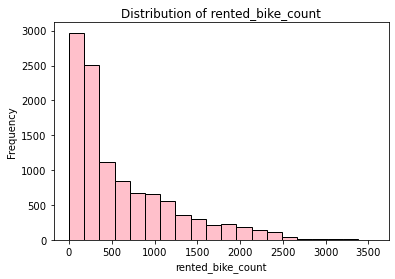

In [8]:
data['rented_bike_count'].plot(kind='hist', bins=20, edgecolor='black', color='pink')
plt.title('Distribution of rented_bike_count')
plt.xlabel('rented_bike_count')
plt.ylabel('Frequency')
plt.show()

Athis variable has a right-skewed or heavy-tailed distribution, which may require a transformation for modeling part (to be evaluated while predicting the models).

In [9]:
log_target = pd.DataFrame()
filtered_data = data[data['rented_bike_count'] != 0]
log_target['log_rented_bike_count'] = np.log(filtered_data['rented_bike_count'])
log_target['log_rented_bike_count']

0        6.937314
1        6.224558
2        4.744932
3        5.634790
4        4.430817
           ...   
10945    5.236442
10946    4.234107
10947    6.816736
10948    5.252273
10949    5.327876
Name: log_rented_bike_count, Length: 10655, dtype: float64

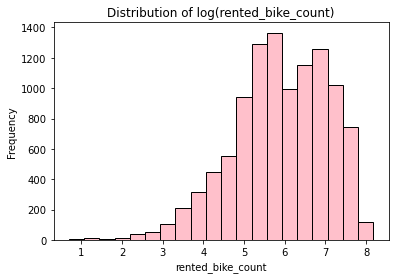

In [10]:
log_target['log_rented_bike_count'].plot(kind='hist', bins=20, edgecolor='black', color='pink')
plt.title('Distribution of log(rented_bike_count)')
plt.xlabel('rented_bike_count')
plt.ylabel('Frequency')
plt.show()

In [11]:
transformed_rented_bike_count, lambda_best_fit = stats.boxcox(filtered_data['rented_bike_count'])

boxcox_target = pd.DataFrame()
boxcox_target['boxcox_rented_bike_count'] = transformed_rented_bike_count


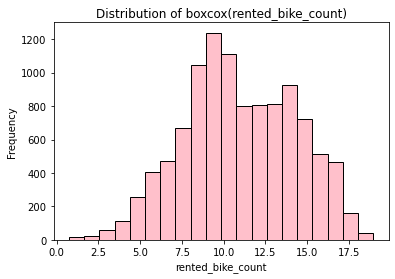

In [12]:
boxcox_target['boxcox_rented_bike_count'].plot(kind='hist', bins=20, edgecolor='black', color='pink')
plt.title('Distribution of boxcox(rented_bike_count)')
plt.xlabel('rented_bike_count')
plt.ylabel('Frequency')
plt.show()

This variable is understood as count of rented bikes peer hour. In consequence of this structure, we exclude seasonality due to the weekday, time of a year, and focus just on the specific hours. Nevertheless, this approach might be missleading, since demand on weekday's work hours will be significantly lower than during the "work hours" in weekend. Other way around, on the week day morning the demand may be higher than on weekend morning. This may cause some bias on our average (without knowing whether it is week-day or not). <br>
Fortunatelly, weekday variable will be included in our models, helping to distinct those two cases. It will be created in "Date" section. In modelling notation, the variables should be treated jointly as weekday:hour. 

In [13]:
data['Hour'] = data['Hour'].astype('category')
hourly_variance = data.groupby('Hour')['rented_bike_count'].var().reset_index()
hourly_variance.columns = ['Hour', 'Variance']

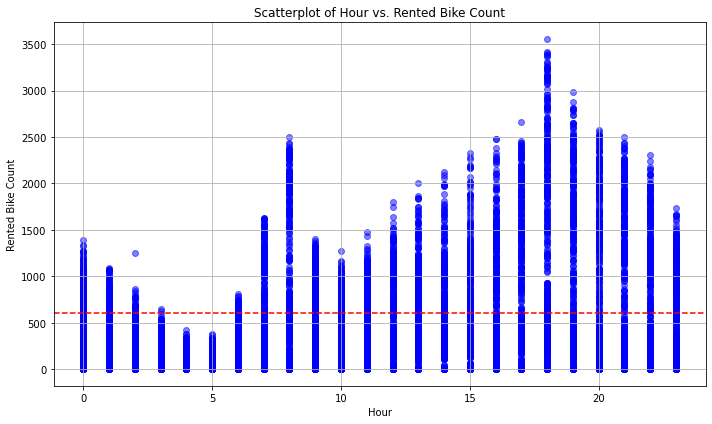

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Hour'], data['rented_bike_count'], alpha=0.5, color='blue')

average_rented_bike_count = data['rented_bike_count'].mean()

plt.axhline(y=average_rented_bike_count, color='red', linestyle='--', label='Average Rented Bike Count')

plt.title('Scatterplot of Hour vs. Rented Bike Count')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.tight_layout()
plt.show()


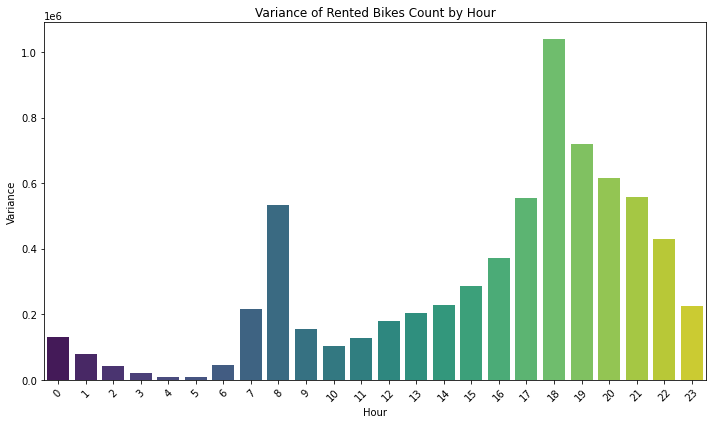

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Variance', data=hourly_variance, palette='viridis')
plt.title("Variance of Rented Bikes Count by Hour")
plt.xlabel('Hour')
plt.ylabel('Variance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This plot partially confirms our hypothesis and warns us that morning hours and well the late evening hours might be a week-day-specific. We may try to add a binary variable "weekend" based on "Date".

### Date

In [16]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.date

In [15]:
print("min date", min(data["Date"]), "max date", max(data["Date"]))

min date 2017-12-01 max date 2018-11-30


In [16]:
data['Date'] = pd.to_datetime(data['Date'])
data['weekend'] = (data['Date'].dt.dayofweek >= 5).astype(int)

# 5 and 6 correspond to Saturday and Sunday
# 0 to 4 correspond to Monday to Friday

print(data[['Date', 'weekend']])


            Date  weekend
0     2018-06-28        0
1     2018-05-30        0
2     2018-02-05        0
3     2017-12-10        1
4     2017-12-08        0
...          ...      ...
10945 2018-11-04        1
10946 2018-05-17        0
10947 2018-06-29        0
10948 2018-03-01        0
10949 2018-11-05        0

[10950 rows x 2 columns]


In [17]:
data['weekend'] = data['weekend'].astype('category')
hourly_variance2 = data.groupby(['Hour', 'weekend'])['rented_bike_count'].var().reset_index()
hourly_variance2.columns = ['Hour', 'weekend', 'Variance']

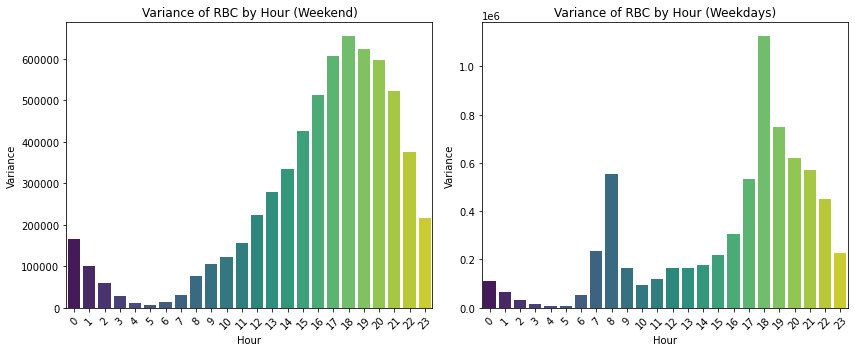

In [18]:
weekend_data = hourly_variance2[hourly_variance2['weekend'] == 1]
weekdays_data = hourly_variance2[hourly_variance2['weekend'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# weekend
sns.barplot(x='Hour', y='Variance', data=weekend_data, palette='viridis', ax=axes[0])
axes[0].set_title("Variance of RBC by Hour (Weekend)")
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Variance')
axes[0].tick_params(axis='x', rotation=45)

# weekdays
sns.barplot(x='Hour', y='Variance', data=weekdays_data, palette='viridis', ax=axes[1])
axes[1].set_title("Variance of RBC by Hour (Weekdays)")
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Variance')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


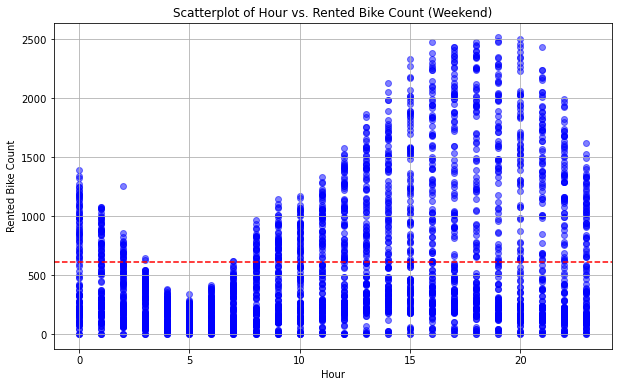

In [19]:
data_weekday1 = data[data['weekend'] == 1]

plt.figure(figsize=(10, 6))

plt.scatter(data_weekday1['Hour'], data_weekday1['rented_bike_count'], alpha=0.5, color='blue')
plt.axhline(y=average_rented_bike_count, color='red', linestyle='--', label='Average Rented Bike Count')
plt.title('Scatterplot of Hour vs. Rented Bike Count (Weekend)')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.grid(True)

plt.show()


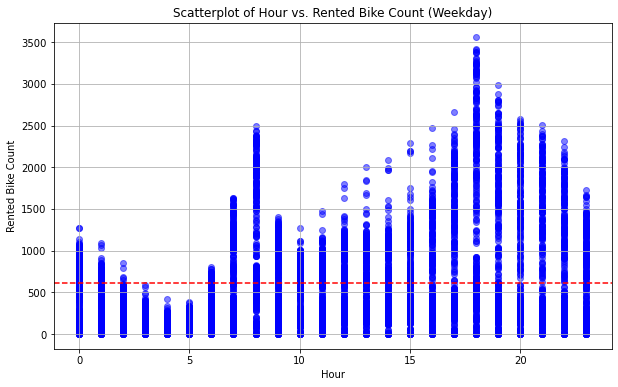

In [20]:
data_weekday0 = data[data['weekend'] == 0]

plt.figure(figsize=(10, 6))

plt.scatter(data_weekday0['Hour'], data_weekday0['rented_bike_count'], alpha=0.5, color='blue')
plt.axhline(y=average_rented_bike_count, color='red', linestyle='--', label='Average Rented Bike Count')
plt.title('Scatterplot of Hour vs. Rented Bike Count (Weekday)')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.grid(True)


plt.show()

It seems that seasonality is observable. In weekday, the rented bike counts approaching event 2500 ok bikes in the morning (e.g. poeple who are going to work), while in a weekend the renals has no single "peaks" rather the increasing trend to rent more closer to the evening. The "weekend" variable will be usefull.

### Functioning Day

In [21]:
data.rename(columns = {'Functioning Day':'func_day'}, inplace = True)
data['func_day'] = data['func_day'].replace({"Yes": 1, "No": 0})

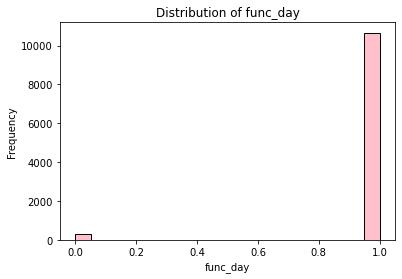

In [22]:
data['func_day'].plot(kind='hist', bins=20, edgecolor='black', color='pink')
plt.title('Distribution of func_day')
plt.xlabel('func_day')
plt.ylabel('Frequency')
plt.show()

In [23]:
data['func_day'].sum()

10655

In [24]:
instances = data[(data['func_day'] == 0) & (data['rented_bike_count'] != 0)]
instances

,id,Date,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,func_day,Holiday,Hour,Humidity,Rainfall,rented_bike_count,Seasons,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed,weekend


We can observe than whenever the company in not working, the bikes are not rented. However, we should assume that company do not supply the bikes on not working days, thus, we do not need to predict any demand. We can exclude observations when the company is not working from our dataset.

In [25]:
data2 = data[data['func_day'] == 1]

### Holiday

In [26]:
data2['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [27]:
data2.rename(columns = {'Holiday':'holiday'}, inplace = True)
data2['holiday'] = data2['holiday'].replace({"Holiday": 1, "No Holiday": 0})

/var/folders/6d/msc4gjbd6s395446l8ch8g_c0000gn/T/ipykernel_69329/1824343840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.rename(columns = {'Holiday':'holiday'}, inplace = True)
/var/folders/6d/msc4gjbd6s395446l8ch8g_c0000gn/T/ipykernel_69329/1824343840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['holiday'] = data2['holiday'].replace({"Holiday": 1, "No Holiday": 0})


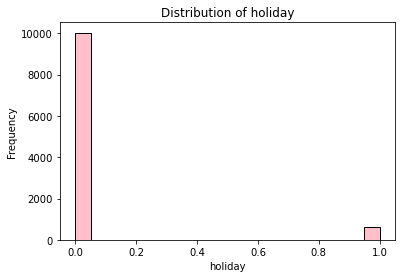

In [28]:
data2['holiday'].plot(kind='hist', bins=20, edgecolor='black', color='pink')
plt.title('Distribution of holiday')
plt.xlabel('holiday')
plt.ylabel('Frequency')
plt.show()

In [29]:
instances = data2[(data2['holiday'] == 1) & (data2['rented_bike_count'] != 0)]
instances

,id,Date,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,func_day,holiday,Hour,Humidity,Rainfall,rented_bike_count,Seasons,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed,weekend
7,8,2018-02-17,-21.7,0.641840,0.594087,0.743995,0.441905,0.472894,0.085727,0.269452,0.682190,0.602050,0.565844,1,1,17,17,0.0,250,Winter,0.0,0.79,0.6,2000,3.3,1
14,15,2018-03-01,-12.6,0.003113,0.358993,0.038654,0.744501,0.312427,0.098216,0.891987,0.401042,0.460166,0.281279,1,1,17,37,0.0,423,Spring,0.0,1.23,0.4,1366,5.2,0
18,19,2018-01-01,-13.7,0.075739,0.985182,0.343514,0.298611,0.872011,0.546590,0.813325,0.695679,0.502232,0.965769,1,1,16,28,0.0,310,Winter,0.0,0.51,3.0,1864,2.5,0
50,51,2018-08-15,21.3,0.292065,0.781472,0.406579,0.864919,0.459747,0.781330,0.956517,0.494056,0.634375,0.629159,1,1,10,49,0.0,547,Summer,0.0,2.09,33.5,1937,1.0,0
74,75,2017-12-31,-5.6,0.356523,0.352391,0.394257,0.965209,0.634907,0.322275,0.095909,0.350067,0.313194,0.855729,1,1,11,62,0.0,142,Winter,1.1,0.88,0.8,801,2.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10888,10889,2017-12-31,-1.0,0.329503,0.778883,0.401748,0.997735,0.759041,0.310060,0.184638,0.514410,0.429769,0.000477,1,1,3,91,1.0,65,Winter,1.2,0.00,0.3,172,2.0,1
10913,10914,2018-02-15,-19.0,0.191020,0.104607,0.133765,0.036041,0.678796,0.966893,0.640606,0.573113,0.254135,0.746621,1,1,15,17,0.0,276,Winter,0.0,1.97,3.8,2000,3.2,0
10915,10916,2018-05-22,15.8,0.898290,0.981365,0.229546,0.952402,0.321011,0.153910,0.167415,0.388011,0.126709,0.170219,1,1,17,84,1.0,50,Spring,0.0,0.28,18.6,499,1.8,0
10916,10917,2018-03-01,1.4,0.595289,0.257297,0.425463,0.024778,0.482922,0.622069,0.717499,0.546674,0.454891,0.496387,1,1,0,96,2.0,71,Spring,0.0,0.00,2.0,1894,1.3,0


The holiday variable in inbalanced and may bias the model.

### Seasons

In [30]:
data2['Seasons'].unique()

array(['Summer', 'Spring', 'Winter', 'Autumn'], dtype=object)

In [31]:
data2.rename(columns = {'Seasons':'seasons'}, inplace = True)

/var/folders/6d/msc4gjbd6s395446l8ch8g_c0000gn/T/ipykernel_69329/1108096289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.rename(columns = {'Seasons':'seasons'}, inplace = True)


In [32]:
data2 = pd.concat([data2, pd.get_dummies(data2['seasons'])], axis=1)
data2.drop(columns=['seasons'], inplace=True)
data2

,id,Date,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,func_day,holiday,Hour,Humidity,Rainfall,rented_bike_count,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed,weekend,Autumn,Spring,Summer,Winter
0,1,2018-06-28,21.6,0.807048,0.661404,0.239180,0.029566,0.285581,0.919743,0.658024,0.758270,0.567133,0.885346,1,0,14,72,0.0,1030,0.0,0.91,27.1,1126,3.0,0,0,0,1,0
1,2,2018-05-30,15.8,0.779319,0.871930,0.850285,0.010038,0.558593,0.137885,0.594906,0.366201,0.444052,0.883390,1,0,6,84,0.0,505,0.0,0.01,18.6,316,0.7,0,0,1,0,0
2,3,2018-02-05,-19.6,0.093343,0.323682,0.673909,0.081728,0.504899,0.566201,0.300785,0.549105,0.189687,0.137707,1,0,23,47,0.0,115,0.0,0.00,-10.5,1794,2.8,0,0,0,0,1
3,4,2017-12-10,-8.4,0.875323,0.981162,0.375848,0.885788,0.865950,0.976790,0.956637,0.605013,0.190490,0.293225,1,0,1,54,0.0,280,0.0,0.00,-0.2,1747,0.5,1,0,0,0,1
4,5,2017-12-08,-13.1,0.169937,0.077911,0.920243,0.535755,0.435548,0.282394,0.724982,0.452029,0.357426,0.465793,1,0,5,56,0.0,84,0.0,0.00,-5.8,1941,2.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10945,10946,2018-11-04,1.7,0.357895,0.608530,0.980414,0.000346,0.768198,0.976654,0.919547,0.265410,0.425335,0.287219,1,0,4,70,0.0,188,0.0,0.00,6.9,1314,1.5,1,1,0,0,0
10946,10947,2018-05-17,18.5,0.280676,0.650333,0.885385,0.258184,0.963983,0.995637,0.666434,0.416586,0.096081,0.877448,1,0,6,98,0.0,69,0.0,0.00,18.9,338,0.3,0,0,1,0,0
10947,10948,2018-06-29,19.8,0.389350,0.920398,0.144066,0.314417,0.630135,0.331942,0.812501,0.369133,0.383591,0.212514,1,0,10,76,0.0,913,0.0,1.58,24.4,617,2.1,0,0,0,1,0
10948,10949,2018-03-01,-8.3,0.407230,0.288520,0.875963,0.693415,0.745771,0.704356,0.275043,0.458393,0.493100,0.927862,1,1,10,53,0.0,191,0.0,1.12,0.1,1022,5.3,0,0,1,0,0


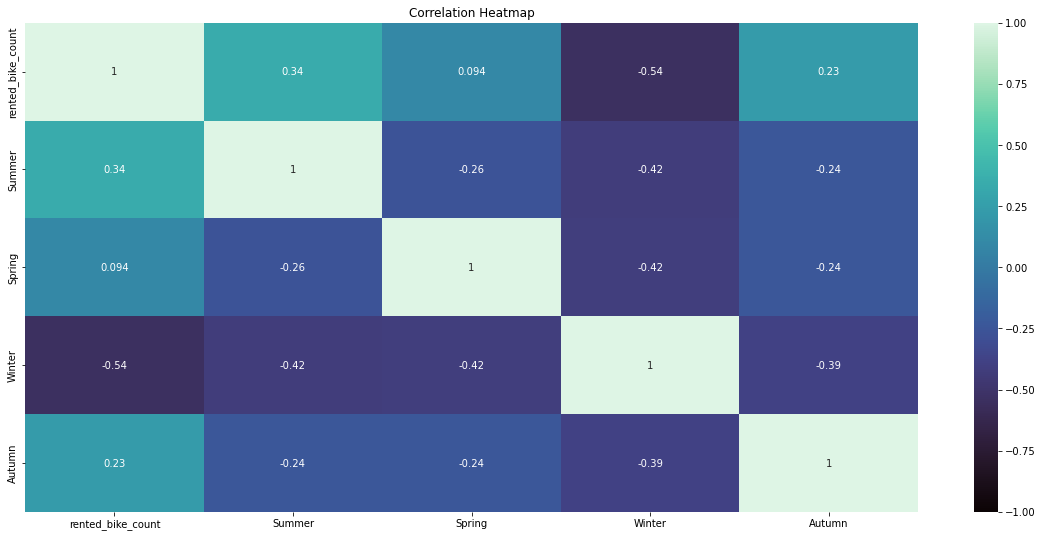

In [33]:
seasons = data2[['rented_bike_count', 'Summer','Spring', 'Winter', 'Autumn']]
corr = seasons.corr()

plt.figure(figsize=(20,9))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

Here we are only interested in first column, which shows us that Winter and Summer are varables with the higher correlation with the target variable. 

### Dew point temperature

The definition of dew point is the temperature point at which the air can hold no more water (water vapor) and is one of the factors in the heat index. It is always lower or the same as the air temperature. When the dew point is low, like around 50 - 60°F/10 - 15°C, the air will feel comfortable.

In [ ]:
data2.rename(columns = {'Dew point temperature':'dewp_temp'}, inplace = True)

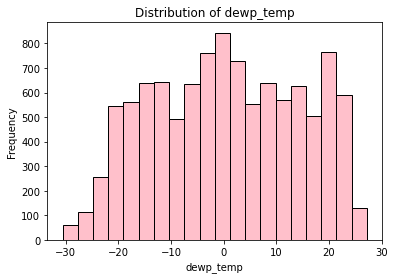

In [ ]:
data2['dewp_temp'].plot(kind='hist', bins=20, edgecolor='black', color='pink')
plt.title('Distribution of dewp_temp')
plt.xlabel('dewp_temp')
plt.ylabel('Frequency')
plt.show()

### featX

We face 10 of features numered from 1 to 10 which are not-null, numeric, continuous data varying from 0 to 1. Based on the min and max value we may suspect that these are some probabilities or percentage data, but the direct explanation hasn't been provided in the dataset description. We can explore their corelation with each other and correlation with target variable, to fin out whether they are actually important for this analysis.

In [ ]:
data_feat_subset1 = data2.loc[:, ["feat01", "feat02", "feat03", "feat04", "feat05", "feat06", "feat07", "feat08", "feat09", "feat10"]]


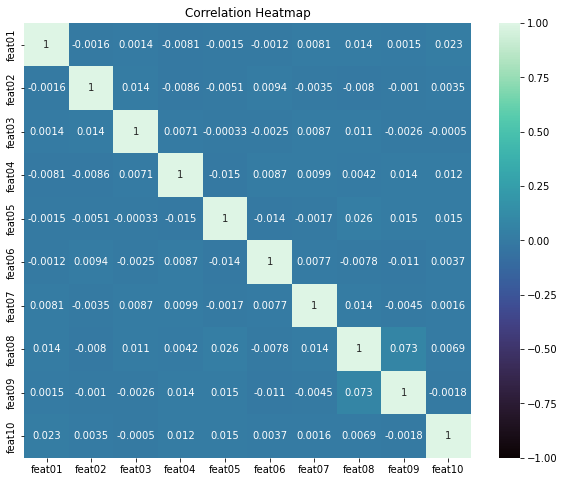

In [ ]:
corr = data_feat_subset1.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data_feat_subset2 = data2.loc[:, ["rented_bike_count", "feat01", "feat02", "feat03", "feat04", "feat05", "feat06", "feat07", "feat08", "feat09", "feat10"]]


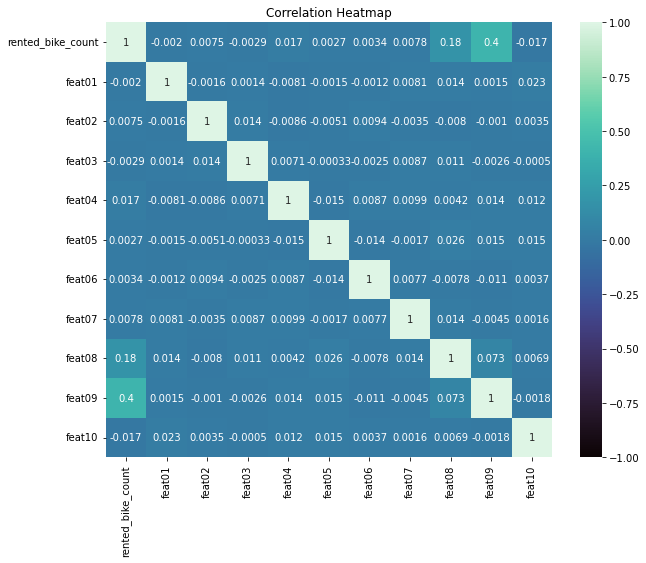

In [ ]:
corr = data_feat_subset2.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

We can observe, that the features are not correlated with each other, and mostly nor with the target variable. Only feature 8 and feature 9 are in some sense correlated with the target variable. These two are also not correlated with each other. This gives us a basis to reject remaining features.

In [ ]:
# col_to_excl = ["feat01", "feat02", "feat03", "feat04", "feat05", "feat06", "feat07", "feat10"]
data3 = data2

### Hour

In [ ]:
data3.rename(columns = {"Hour":"hour"}, inplace=True)

In [ ]:
hour_counts = data3["hour"].value_counts().reset_index()
hour_counts.columns = ["Hour", "Count"]
hour_counts.sort_values(by="Hour")

,Hour,Count
0,0,444
1,1,444
21,2,444
20,3,444
19,4,444
18,5,444
23,6,443
17,7,444
16,8,444
15,9,444


We observe that the measurments for each hour are similar, noting that for hours 0-5 we have one measurment more then for the remaining hours. 

In [ ]:
data3['hour'] = data3['hour'].astype('int')

### Humidity

In [ ]:
data3.rename(columns = {"Humidity":"humidity"}, inplace=True)

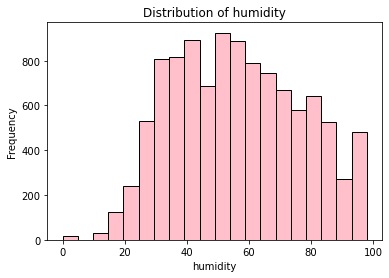

In [ ]:
data3['humidity'].plot(kind='hist', bins=20, edgecolor='black', color='pink')
plt.title('Distribution of humidity')
plt.xlabel('humidity')
plt.ylabel('Frequency')
plt.show()

### Rainfall

In [ ]:
data3.rename(columns = {"Rainfall":"rainfall"}, inplace=True)

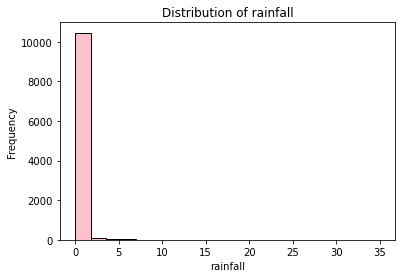

In [ ]:
data3['rainfall'].plot(kind='hist', bins=20, edgecolor='black', color='pink')
plt.title('Distribution of rainfall')
plt.xlabel('rainfall')
plt.ylabel('Frequency')
plt.show()

In [ ]:
rainfall_zero_count = (data3["rainfall"] == 0).sum()
print("Count of 'rainfall' equal to 0:", rainfall_zero_count, 'out of 10655')

Count of 'rainfall' equal to 0: 10095 out of 10655


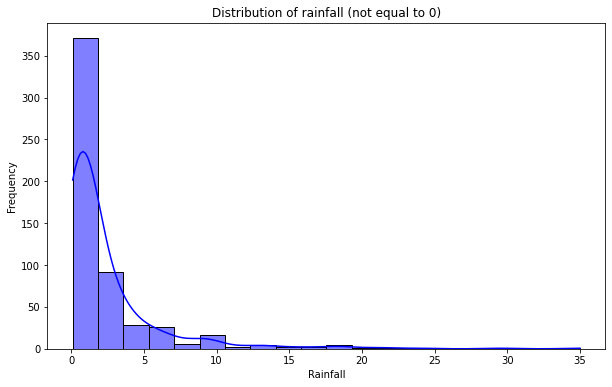

In [ ]:
rainfall_not_zero = data3[data3["rainfall"] != 0]

plt.figure(figsize=(10, 6))
sns.histplot(rainfall_not_zero["rainfall"], bins=20, kde=True, edgecolor='black', color='blue')
plt.title("Distribution of rainfall (not equal to 0)")
plt.xlabel("Rainfall")
plt.ylabel("Frequency")
plt.show()

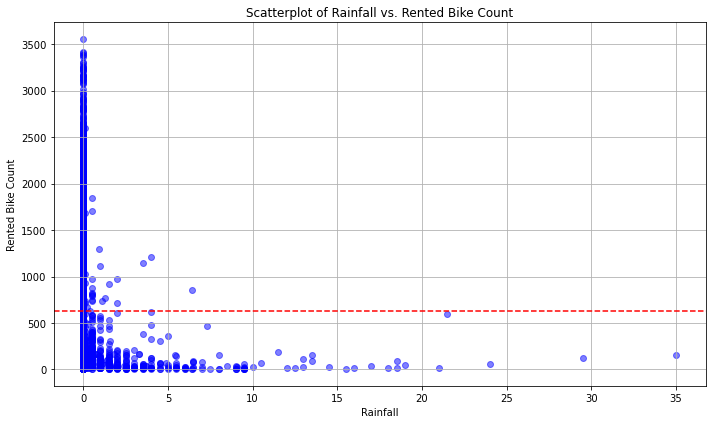

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data3['rainfall'], data3['rented_bike_count'], alpha=0.5, color='blue')

average_rented_bike_count = data3['rented_bike_count'].mean()

plt.axhline(y=average_rented_bike_count, color='red', linestyle='--', label='Average Rented Bike Count')

plt.title('Scatterplot of Rainfall vs. Rented Bike Count')
plt.xlabel('Rainfall')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.tight_layout()
plt.show()


We observe that up to some level of rainfall the count of rented bikes can still be over the average. It would help us to set a threshold for the transformation to the binary variable.

In [ ]:
rainfall_threshold = 0.2
data3['rainfall_binary'] = (data3['rainfall'] > rainfall_threshold).astype(int)

In [ ]:
sum(data3['rainfall_binary'])

483

The rainfall variable in inbalanced an may bias the model.

### Snowfall

In [ ]:
data3.rename(columns = {"Snowfall":"snowfall"}, inplace=True)

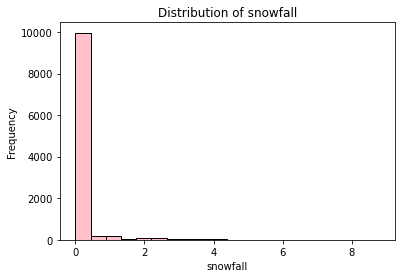

In [ ]:
data3['snowfall'].plot(kind='hist', bins=20, edgecolor='black', color='pink')
plt.title('Distribution of snowfall')
plt.xlabel('snowfall')
plt.ylabel('Frequency')
plt.show()

In [ ]:
snowfall_zero_count = (data3["snowfall"] == 0).sum()
print("Count of 'snowfall' equal to 0:", snowfall_zero_count, 'out of 10950')

Count of 'snowfall' equal to 0: 9820 out of 10950


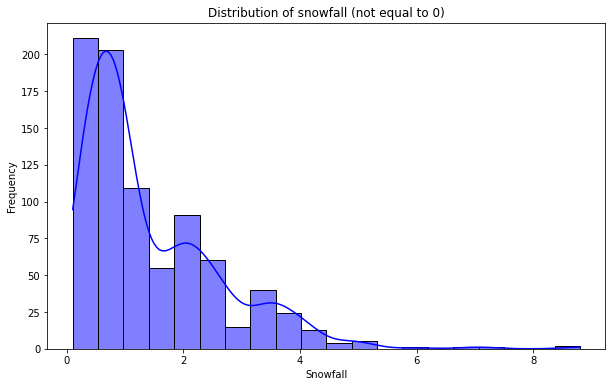

In [ ]:
snowfall_not_zero = data3[data3["snowfall"] != 0]

plt.figure(figsize=(10, 6))
sns.histplot(snowfall_not_zero["snowfall"], bins=20, kde=True, edgecolor='black', color='blue')
plt.title("Distribution of snowfall (not equal to 0)")
plt.xlabel("Snowfall")
plt.ylabel("Frequency")
plt.show()

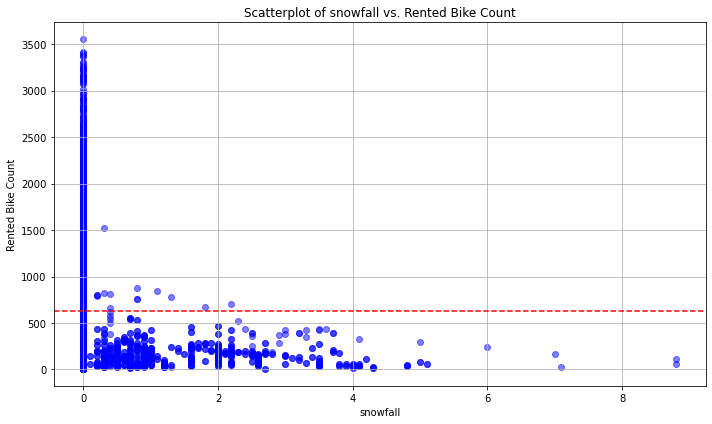

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data3['snowfall'], data3['rented_bike_count'], alpha=0.5, color='blue')

average_rented_bike_count = data3['rented_bike_count'].mean()

plt.axhline(y=average_rented_bike_count, color='red', linestyle='--', label='Average Rented Bike Count')

plt.title('Scatterplot of snowfall vs. Rented Bike Count')
plt.xlabel('snowfall')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.tight_layout()
plt.show()


Here we observeo only the group of the most persistent ones who are renting a bike during the snowfall (below average number when snowfall occurs).

In [ ]:
snowfall_threshold = 0.1
data3['snowfall_binary'] = (data3['snowfall'] > snowfall_threshold).astype(int)

In [ ]:
sum(data3['snowfall_binary'])

831

The snowfall is also inbalanced, but less than rainfall and it reveals some more characteristic trends.

### Solar Radiation

In [ ]:
data3.rename(columns = {"Solar Radiation":"solar_radiation"}, inplace=True)

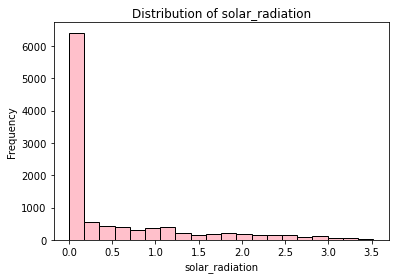

In [ ]:
data3['solar_radiation'].plot(kind='hist', bins=20, edgecolor='black', color='pink')
plt.title('Distribution of solar_radiation')
plt.xlabel('solar_radiation')
plt.ylabel('Frequency')
plt.show()

In [ ]:
solar_radiation_zero_count = (data3["solar_radiation"] == 0).sum()
print("Count of 'solar_radiation' equal to 0:", solar_radiation_zero_count, 'out of 10655')

Count of 'solar_radiation' equal to 0: 5439 out of 10655


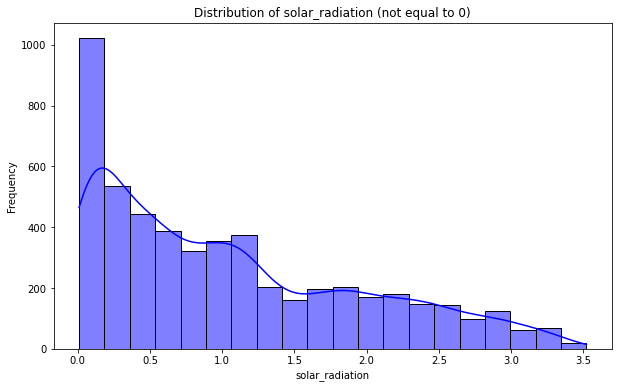

In [ ]:
solar_radiation_not_zero = data3[data3["solar_radiation"] != 0]

plt.figure(figsize=(10, 6))
sns.histplot(solar_radiation_not_zero["solar_radiation"], bins=20, kde=True, edgecolor='black', color='blue')
plt.title("Distribution of solar_radiation (not equal to 0)")
plt.xlabel("solar_radiation")
plt.ylabel("Frequency")
plt.show()

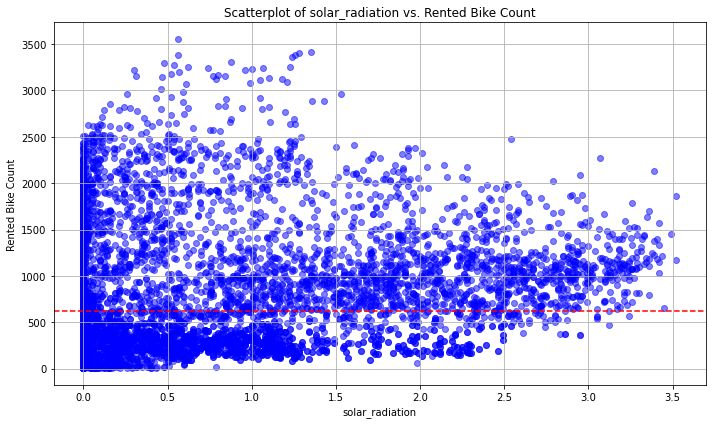

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data3['solar_radiation'], data3['rented_bike_count'], alpha=0.5, color='blue')

average_rented_bike_count = data2['rented_bike_count'].mean()

plt.axhline(y=average_rented_bike_count, color='red', linestyle='--', label='Average Rented Bike Count')

plt.title('Scatterplot of solar_radiation vs. Rented Bike Count')
plt.xlabel('solar_radiation')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.tight_layout()
plt.show()


This scatterplot doesn't bring any obvious information. We see where some trendlines can be drawn, but it seems unneccessary to transform.

### Temperature

In [ ]:
data3.rename(columns = {"Temperature":"temperature"}, inplace=True)

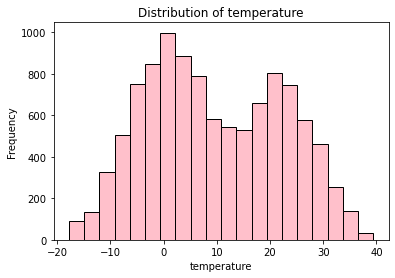

In [ ]:
data3['temperature'].plot(kind='hist', bins=20, edgecolor='black', color='pink')
plt.title('Distribution of temperature')
plt.xlabel('temperature')
plt.ylabel('Frequency')
plt.show()

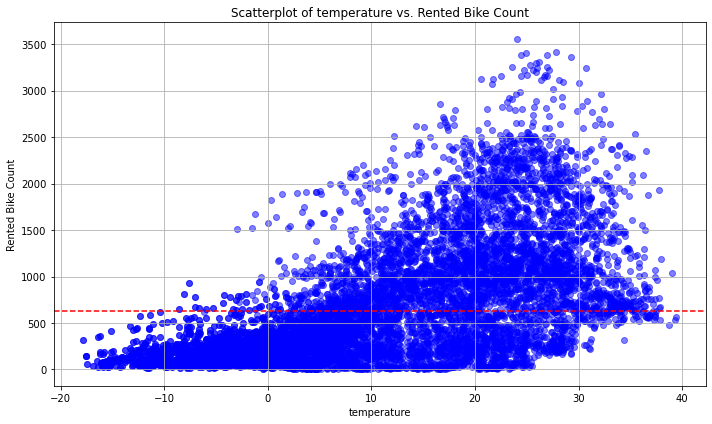

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data3['temperature'], data3['rented_bike_count'], alpha=0.5, color='blue')

average_rented_bike_count = data2['rented_bike_count'].mean()

plt.axhline(y=average_rented_bike_count, color='red', linestyle='--', label='Average Rented Bike Count')

plt.title('Scatterplot of temperature vs. Rented Bike Count')
plt.xlabel('temperature')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.tight_layout()
plt.show()


### Visibility

In [ ]:
data3.rename(columns = {"Visibility":"visibility"}, inplace=True)

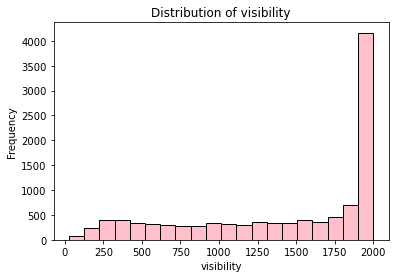

In [ ]:
data3['visibility'].plot(kind='hist', bins=20, edgecolor='black', color='pink')
plt.title('Distribution of visibility')
plt.xlabel('visibility')
plt.ylabel('Frequency')
plt.show()

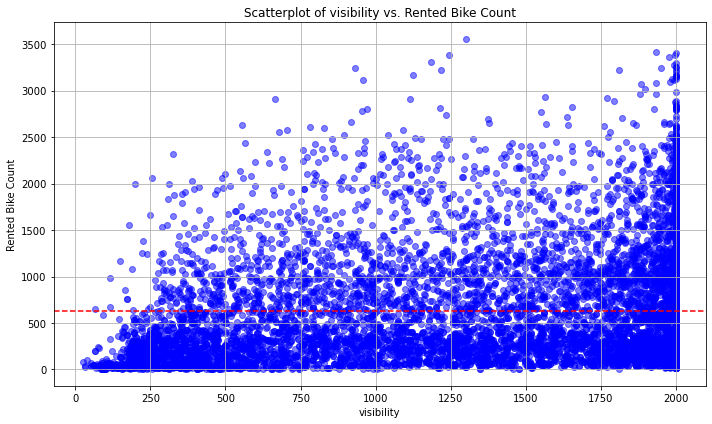

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data3['visibility'], data3['rented_bike_count'], alpha=0.5, color='blue')

average_rented_bike_count = data3['rented_bike_count'].mean()

plt.axhline(y=average_rented_bike_count, color='red', linestyle='--', label='Average Rented Bike Count')

plt.title('Scatterplot of visibility vs. Rented Bike Count')
plt.xlabel('visibility')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.tight_layout()
plt.show()


This scatterplot doesn't bring any obvious information. This variable may not bring valuable information to the model.

### Wind speed

In [ ]:
data3.rename(columns = {"Wind speed":"wind_speed"}, inplace=True)

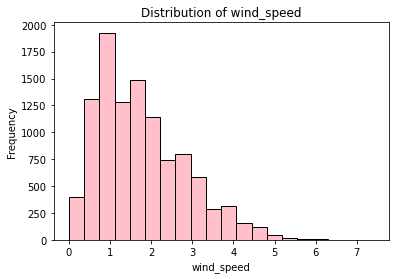

In [ ]:
data3['wind_speed'].plot(kind='hist', bins=20, edgecolor='black', color='pink')
plt.title('Distribution of wind_speed')
plt.xlabel('wind_speed')
plt.ylabel('Frequency')
plt.show()

### Overall

In [ ]:
data4 = data3.drop(columns =['id', "Date", "func_day", "feat01", "feat02", "feat03", "feat04", "feat05", "feat06", "feat07", "feat10"])

In [ ]:
data4

,dewp_temp,feat08,feat09,holiday,hour,humidity,rainfall,rented_bike_count,snowfall,solar_radiation,temperature,visibility,wind_speed,weekend,Autumn,Spring,Summer,Winter,rainfall_binary,snowfall_binary
0,21.6,0.758270,0.567133,0,14,72,0.0,1030,0.0,0.91,27.1,1126,3.0,0,0,0,1,0,0,0
1,15.8,0.366201,0.444052,0,6,84,0.0,505,0.0,0.01,18.6,316,0.7,0,0,1,0,0,0,0
2,-19.6,0.549105,0.189687,0,23,47,0.0,115,0.0,0.00,-10.5,1794,2.8,0,0,0,0,1,0,0
3,-8.4,0.605013,0.190490,0,1,54,0.0,280,0.0,0.00,-0.2,1747,0.5,1,0,0,0,1,0,0
4,-13.1,0.452029,0.357426,0,5,56,0.0,84,0.0,0.00,-5.8,1941,2.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10945,1.7,0.265410,0.425335,0,4,70,0.0,188,0.0,0.00,6.9,1314,1.5,1,1,0,0,0,0,0
10946,18.5,0.416586,0.096081,0,6,98,0.0,69,0.0,0.00,18.9,338,0.3,0,0,1,0,0,0,0
10947,19.8,0.369133,0.383591,0,10,76,0.0,913,0.0,1.58,24.4,617,2.1,0,0,0,1,0,0,0
10948,-8.3,0.458393,0.493100,1,10,53,0.0,191,0.0,1.12,0.1,1022,5.3,0,0,1,0,0,0,0


In [ ]:
data4['weekend'] = data4['weekend'].astype('int64')

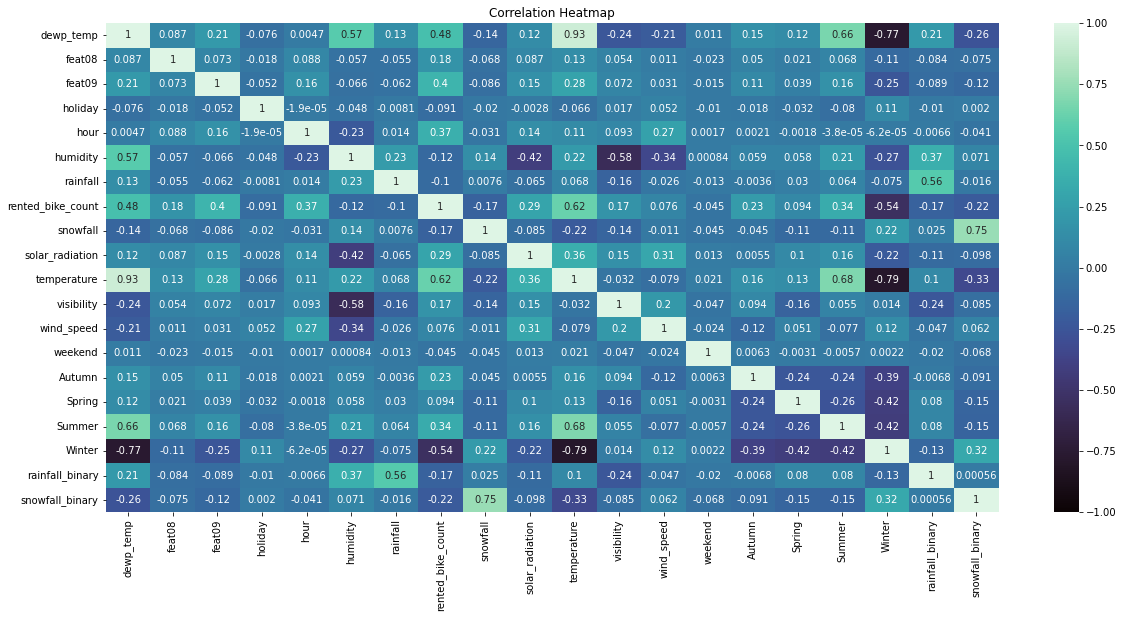

In [ ]:
corr = data4.corr()

plt.figure(figsize=(20,9))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data5 = data4.drop(columns = ["rainfall","snowfall"])

After all, we also see highly correlated visibility and humidity, as well Winter and temperature. This is oustanding correlation in comparison to the remaining ones, however not alarming to combine those variable to one (e.g. "mist", "cold").

In [ ]:
data5.to_csv('data_after_prep.csv', index=False)

In [ ]:
data4.to_csv('data_after_prep4.csv', index=False)

In [ ]:
data3_new = data3.drop(columns = ['id', "Date", "func_day"])
data3_new.to_csv('data_after_prep3.csv', index=False)